In [55]:
import cv2, os
import numpy as np
import pandas as pd
from keras import utils,layers,models,optimizers
from keras.utils import plot_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.layers import Dense,Dropout,Activation,Flatten
import seaborn as sn
import tensorflow as tf
import keras
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator

In [56]:
data_path="../data/face"

data_list= os.listdir(data_path)
print(data_list)


['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']


In [57]:
def Data_prepare(data_list,path):
    img_data=[]
    clss =[]
    for dataset in data_list:
        img_list=os.listdir(path + "/" + dataset)
        subfolder_path = os.path.join(path, dataset)
        num_items = len([item for item in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, item))])
        print(f"Loading The images from the folder {dataset}, {num_items} images")
        for img in img_list:
            input_img= cv2.imread(path+"/"+dataset+"/"+img)
            input_img_resized= cv2.resize(input_img,(96,96))
            img_data.append(input_img_resized)
            clss.append(dataset)
    data=np.array(img_data)
    data=data.astype("float32")
    data=data/255.0
    return data, img_data, clss

In [58]:
processed_data, img_data, clss = Data_prepare(data_list,data_path)

Loading The images from the folder Angry, 116 images
Loading The images from the folder Fear, 120 images
Loading The images from the folder Happy, 120 images
Loading The images from the folder Neutral, 131 images
Loading The images from the folder Sad, 134 images
Loading The images from the folder Suprise, 131 images


In [59]:
print(len(img_data))
print(len(clss))
# print(clss)

752
752


In [60]:
num_classes= 6
num_train_samples=processed_data.shape[0]
print(f"Train data shape :{processed_data.shape}")


Train data shape :(752, 96, 96, 3)


In [61]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'labels' is your list of categorical labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(clss)
print(encoded_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 

In [62]:
from tensorflow.keras.utils import to_categorical

# Assuming 'encoded_labels' are your numerical labels
one_hot_labels = to_categorical(encoded_labels)

In [63]:
X,Y=shuffle(processed_data,one_hot_labels,random_state=5)

In [64]:
Y

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [65]:
labels = {5:'Surprise', 1:'Fear', 0:'Angry', 3:'Neutral', 4: 'Sad', 2: 'Happy'}

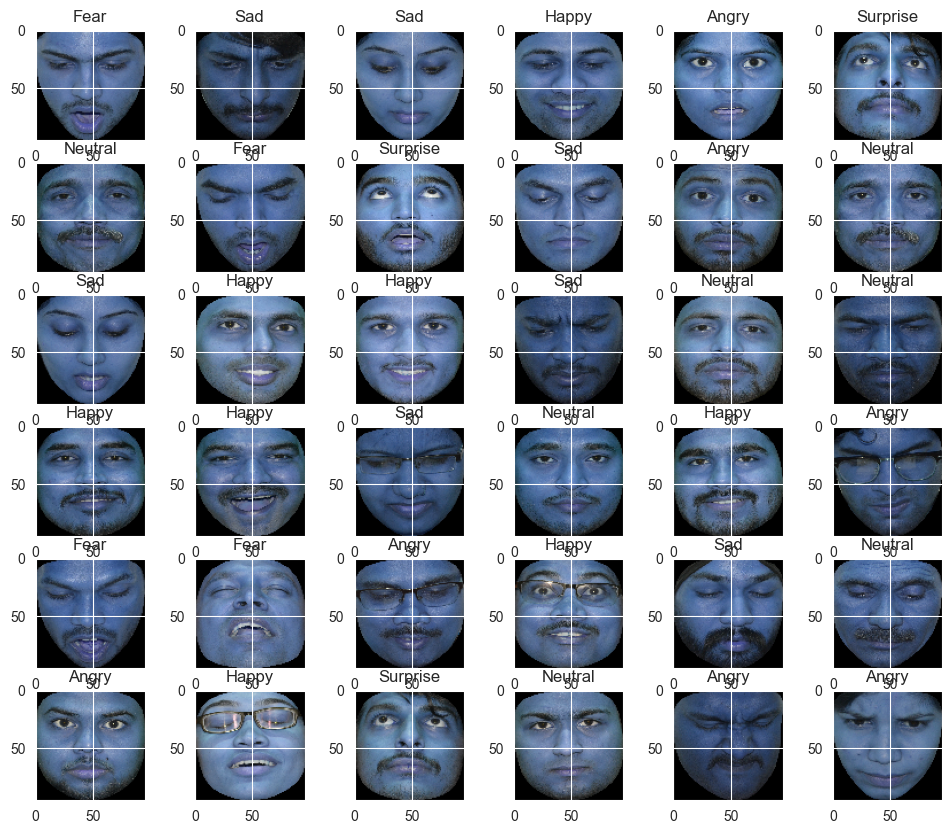

In [66]:
plt.figure(figsize=(12, 10))
for i, j in enumerate(list(np.random.randint(0, len(X), 36))):  # index,item
    plt.subplot(6, 6, i + 1)
    plt.imshow(X[j])
    plt.axis("on")
    plt.title(labels[np.argmax(Y[j])])  # Accessing dictionary using square brackets


In [67]:
from sklearn.model_selection import train_test_split

# Assuming X contains your input data and Y contains corresponding labels
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [68]:
# MobileNetV2_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
# MobileNetV2_model.summary()

In [69]:
labels[np.argmax(Y_test[0])]

'Angry'

In [70]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = models.Sequential()

# model.add(layers.Flatten(input_shape=(96, 96, 3)))
# layers.Dropout(0.4)
# # model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# layers.Dropout(0.25)
# model.add(layers.Dense(64, activation='relu'))
# layers.Dropout(0.25)
# model.add(layers.Dense(6, activation='softmax'))


from tensorflow.keras import models

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(96,96,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  # Adding Dropout after the first convolutional layer

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  # Adding Dropout after the second convolutional layer

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))  # Adding Dropout after the third convolutional layer

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding Dropout after the first dense layer
model.add(Dense(6, activation='softmax'))




In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 94, 94, 256)       7168      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 47, 47, 256)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 47, 47, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 45, 45, 128)       295040    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 22, 22, 128)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 22, 22, 128)      

In [72]:
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              )

In [73]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the filepath to save the best model
filepath = "best_model_2.h5"

# Define the ModelCheckpoint callback to monitor validation accuracy and save the best model
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

In [74]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
# # Define a data augmentation generator
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     shear_range=0.2,
#     zoom_range=0.2,
#     fill_mode='nearest'
# )
#
# # Compute quantities required for feature-wise normalization
# # (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
#
# # Fit the model on the batches generated by datagen.flow()
# history = model.fit(
#     datagen.flow(X_train, Y_train, batch_size=32),
#     steps_per_epoch=X_train.shape[0] // 32,
#     epochs=50,
#     validation_data=(X_test, Y_test)
# )


In [75]:
model.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test), callbacks=[checkpoint] )

Epoch 1/40
19/19 [==============================] - ETA: 0s - loss: 1.8075 - accuracy: 0.1597
Epoch 1: val_accuracy improved from -inf to 0.14570, saving model to best_model_2.h5
19/19 [==============================] - 10s 480ms/step - loss: 1.8075 - accuracy: 0.1597 - val_loss: 1.7917 - val_accuracy: 0.1457
Epoch 2/40


D:\MyWork\DataScience\HRChatBot\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - ETA: 0s - loss: 1.7870 - accuracy: 0.1814
Epoch 2: val_accuracy did not improve from 0.14570
19/19 [==============================] - 9s 481ms/step - loss: 1.7870 - accuracy: 0.1814 - val_loss: 1.7860 - val_accuracy: 0.1457
Epoch 3/40
19/19 [==============================] - ETA: 0s - loss: 1.7760 - accuracy: 0.1880
Epoch 3: val_accuracy improved from 0.14570 to 0.25166, saving model to best_model_2.h5
19/19 [==============================] - 10s 507ms/step - loss: 1.7760 - accuracy: 0.1880 - val_loss: 1.7755 - val_accuracy: 0.2517
Epoch 4/40
19/19 [==============================] - ETA: 0s - loss: 1.7333 - accuracy: 0.2413
Epoch 4: val_accuracy improved from 0.25166 to 0.32450, saving model to best_model_2.h5
19/19 [==============================] - 10s 514ms/step - loss: 1.7333 - accuracy: 0.2413 - val_loss: 1.7001 - val_accuracy: 0.3245
Epoch 5/40
19/19 [==============================] - ETA: 0s - loss: 1.6815 - accuracy: 0.3195
Epoch 5: val_

In [76]:
# Assuming your model is compiled and trained already
# X_test and Y_test are your testing data and labels respectively
loss, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy:', accuracy)


5/5 [==============================] - 1s 120ms/step - loss: 0.9904 - accuracy: 0.6954
Accuracy: 0.695364236831665


5/5 [==============================] - 1s 120ms/step


Text(95.72222222222221, 0.5, 'Truth')

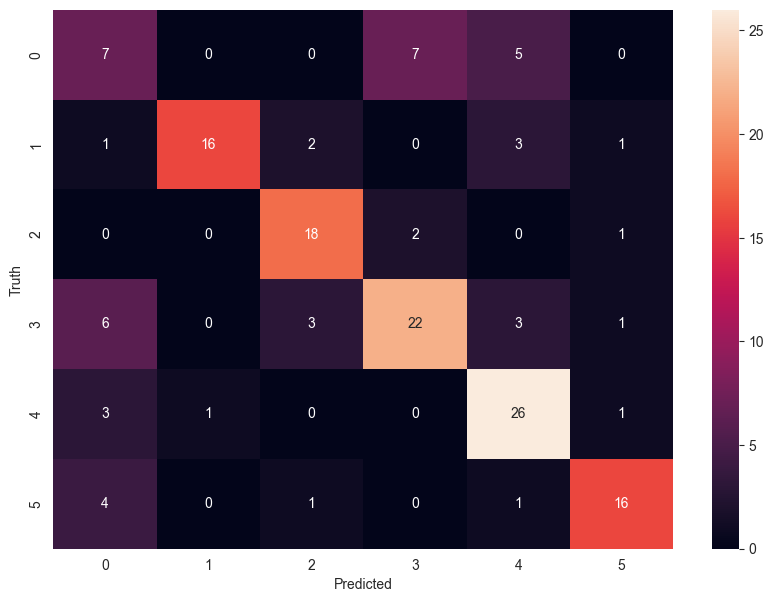

In [77]:
y_pred = model.predict(X_test)
y_pred_labels=[np.argmax(element) for element in y_pred]#returns the index of the highest probability.
y_test_labels=[np.argmax(element) for element in Y_test]
cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_pred_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

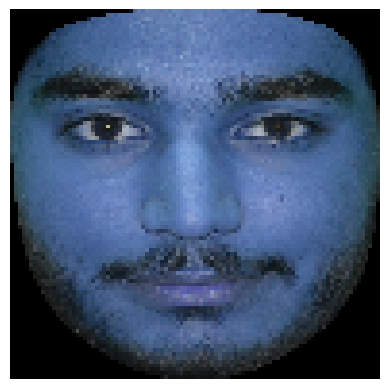

Predicted: Neutral, Actual: Neutral


In [78]:
from IPython.display import clear_output
import time


num_images_to_display = 10
display_time = 3
random_indices = np.random.choice(len(X_test), num_images_to_display, replace=False)



# Assuming Y_test is a numpy array of one-hot encoded labels
# categorical_labels_predict = np.argmax(Y_test, axis=1)
categorical_labels_actual = np.argmax(Y_test, axis=1)
y_pred_probabilities = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

for i in random_indices:
    # Display the image
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.show()

    # Output predicted and actual labels
    print(f"Predicted: {labels[y_pred_labels[i]]}, Actual: {labels[categorical_labels_actual[i]]}")

    # Wait for a few seconds before displaying the next image
    time.sleep(display_time)

    # Clear the output to show the next image cleanly
    clear_output(wait=True)

1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[7.0609406e-07 9.9961805e-01 1.4346537e-07 9.5694936e-12 2.2855766e-10
  3.8109030e-04]]


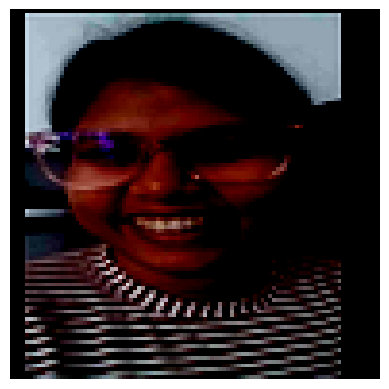

Predicted: Fear


In [79]:
from IPython.display import clear_output
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess_image_for_mobilenet_v2(image_path, target_size=(96, 96)):
    img = Image.open(image_path)
    # Resize the image to the target size
    img = img.resize(target_size, resample=Image.LANCZOS)

    # Convert PIL image to NumPy array
    img_array = np.array(img)

    # If the image is grayscale, repeat the channel to create an RGB image
    if len(img_array.shape) == 2:
        img_array = np.repeat(img_array[:, :, np.newaxis], 3, axis=-1)

    # Preprocess the image for MobileNetV2
    img_array = preprocess_input(img_array)

    return img_array
labels = {5:'Surprise', 1:'Fear', 0:'Angry', 3:'Neutral', 4: 'Sad', 2: 'Happy'}

# Insert the path to the image you want to predict
image_path = "../data/images/validation/fear/21.jpg"

# Preprocess the image for prediction
image = preprocess_image_for_mobilenet_v2(image_path)  # You can use the previously defined preprocessing function

# Make predictions using the model
prediction = model.predict(np.expand_dims(image, axis=0))
print(prediction)

# Get the predicted label
predicted_label = labels[np.argmax(prediction)]

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Output predicted label
print(f"Predicted: {predicted_label}")

# Wait for a few seconds before clearing the output
time.sleep(display_time)
clear_output(wait=True)
